In [1]:
#Titration Calculator for Website
import numpy as np
import matplotlib.pyplot as plt

The function of this code is to calculate the pH of a solution after a titration.
The code is written in Python and is designed to be used in a Jupyter Notebook.

In [2]:
#This is the base class for the titration calculator
class PHCalculator():
    def __init__(self,  volume_analyte, cAcid, cBase):
        self.cAcid = cAcid
        self.cBase = cBase
        self.kw = 1e-14
        self.volume_analyte = volume_analyte

#the def calculate_pH is the function that calculates the pH of the solution after a titration
    def calculate_pH(self, volume_titrant):
        return NotImplemented("This is the base calculator class. Please use a subclass instead.")

#the def plot_curve is the function that plots the pH of the solution after a titration
    def plot_curve(self, volume_titrant_list):
        pH_list = []
        for volume_titrant in volume_titrant_list:
            pH_list.append(self.calculate_pH(volume_titrant))
        fig=plt.figure()
        ax=fig.add_subplot(111)

        ax.plot(volume_titrant_list, pH_list )
        ax.set_xlabel("Volume of Titrant (mL)")
        ax.set_ylabel("pH")
        ax.set_title("pH vs. Volume of Titrant")
        ax.set_ylim(0,14)
        return fig, ax


The following code is the subclass for strong acid titrations.

In [3]:
#This is the subclass for strong acid titrations
class PHCalculatorStrongAcid(PHCalculator):
    def __init__(self, volume_analyte, cAcid, cBase):
        super().__init__(volume_analyte,cAcid, cBase)

    def calculate_pH(self, volume_titrant):
        Va = self.volume_analyte
        Vb = volume_titrant
        CaVa= self.cAcid * Va
        CbVb= self.cBase * Vb
        totalVolume = Va+Vb
        if CaVa>CbVb:
            mProton = (CaVa - CbVb)/totalVolume
            pH = -np.log10(mProton).round(2)
        elif CaVa==CbVb:
            pH = 7
        else:
            mProton = (CbVb - CaVa)/totalVolume
            pH = 14 + np.log10(mProton).round(2)
        return np.clip(pH, 0, 14)


In [4]:
#This is the subclass for strong base titrations
class PHCalculatorStrongBase(PHCalculator):
    def __init__(self, volume_analyte, cAcid, cBase):
        super().__init__(volume_analyte, cAcid, cBase)

    def calculate_pH(self, volume_titrant):
        Va = volume_titrant
        Vb = self.volume_analyte
        CaVa= self.cAcid * Va
        CbVb= self.cBase * Vb
        totalVolume = Va+Vb
        if CbVb>CaVa:
            mHydroxide = (CbVb-CaVa)/totalVolume
            pH= 14 + np.log10(mHydroxide).round(2)
        elif CaVa==CbVb:
            pH = 7
        else:
            mProton = (CaVa-CbVb)/totalVolume
            pH = -np.log10(mProton).round(2)
        return np.clip(pH, 0, 14)


In [5]:
#This is the subclass for weak acid titrations
class PHCalculatorWeakAcid(PHCalculator):
    def __init__(self, volume_analyte, cAcid, cBase, ka):
        super().__init__(volume_analyte, cAcid, cBase)
        self.ka = ka

    def calculate_pH(self, volume_titrant):
        Va = self.volume_analyte
        Vb = volume_titrant
        totalVolume = Va+Vb
        CaVa= self.cAcid * Va
        CbVb= self.cBase * Vb
        concentrationphi= self.cAcid/self.cBase
        phi=Vb/(concentrationphi*Va)
        kb=self.kw/self.ka

        if phi==0:
            mProton=np.sqrt(self.ka* self.cAcid)
            pH=-np.log10(mProton).round(3)
        elif phi>0 and phi<1:
            mProton=self.ka*(1-phi)/phi
            pH=-np.log10(mProton).round(3)
        elif phi==1:
            mHydroxide=np.sqrt(kb*(CaVa/totalVolume))
            pH=14+np.log10(mHydroxide).round(3)
        else:
            mol=CbVb-CaVa
            mHydroxide=mol/totalVolume
            pH=14+np.log10(mHydroxide).round(3)

        return np.clip(pH, 0, 14)

In [6]:
#This is the subclass for weak base titrations
class PHCalculatorWeakBase(PHCalculator):
    def __init__(self, volume_analyte,  cAcid, cBase, kb):
        super().__init__(volume_analyte,  cAcid, cBase)
        self.kb = kb

    def calculate_pH(self, volume_titrant):
        Va = volume_titrant
        Vb = self.volume_analyte
        totalVolume = Va+Vb
        CaVa= self.cAcid * Va
        CbVb= self.cBase * Vb
        concentrationphi= self.cBase/self.cAcid
        phi=Va/(concentrationphi*Vb)
        ka=self.kw/self.kb

        if phi==0:
            mHydroxide=np.sqrt(self.kb* self.cBase)
            pH=14+np.log10(mHydroxide).round(3)
        elif phi>0 and phi<1:
            mHydroxide=self.kb*(1-phi)/phi
            pH=14+np.log10(mHydroxide).round(3)
        elif phi==1:
            mProton=np.sqrt(ka*(CbVb/totalVolume))
            pH=-np.log10(mProton).round(3)
        else:
            mol=CaVa-CbVb
            mProton=mol/totalVolume
            pH=-np.log10(mProton).round(3)
        return np.clip(pH, 0, 14)

# Strong Acid

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'pH vs. Volume of Titrant'}, xlabel='Volume of Titrant (mL)', ylabel='pH'>)

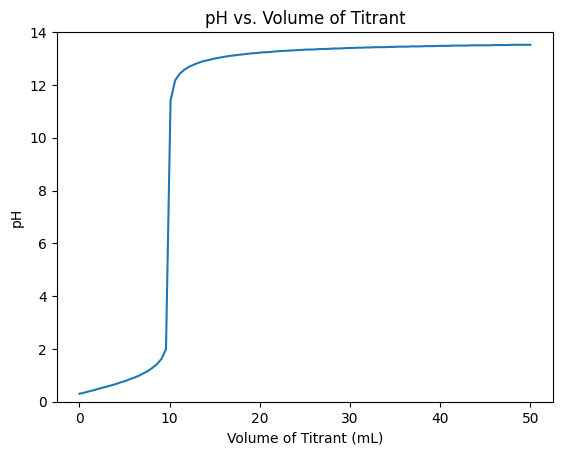

In [7]:
volume_analyte = 10
volume_titrant_list = np.linspace(0,50, 100)
cAcid = 0.5
cBase = 0.5
calculator = PHCalculatorStrongAcid( volume_analyte,cAcid, cBase)
calculator.plot_curve(volume_titrant_list)

# Strong Base

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'pH vs. Volume of Titrant'}, xlabel='Volume of Titrant (mL)', ylabel='pH'>)

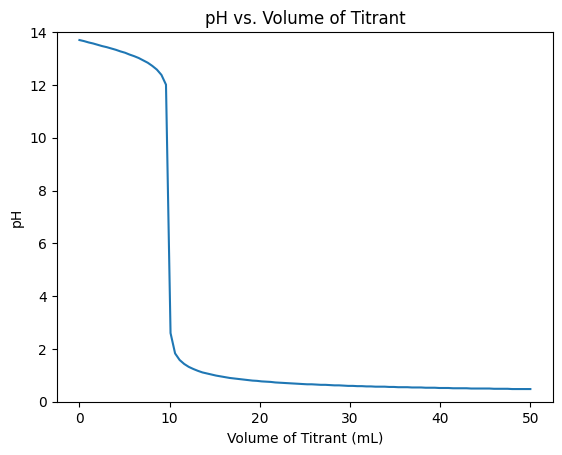

In [8]:
volume_analyte = 10
volume_titrant_list = np.linspace(0,50, 100)
cAcid = 0.5
cBase = 0.5
calculator = PHCalculatorStrongBase(volume_analyte, cAcid, cBase)
calculator.plot_curve(volume_titrant_list)

# Weak Acid

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'pH vs. Volume of Titrant'}, xlabel='Volume of Titrant (mL)', ylabel='pH'>)

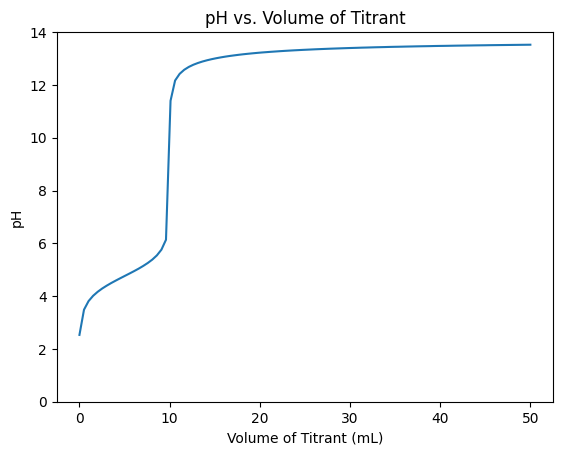

In [9]:
volume_analyte = 10
volume_titrant_list = np.linspace(0,50, 100)
cAcid = 0.5
cBase = 0.5
ka = 10**-4.76

calculator = PHCalculatorWeakAcid(volume_analyte, cAcid, cBase, ka)
calculator.plot_curve(volume_titrant_list)

# Weak Base

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'pH vs. Volume of Titrant'}, xlabel='Volume of Titrant (mL)', ylabel='pH'>)

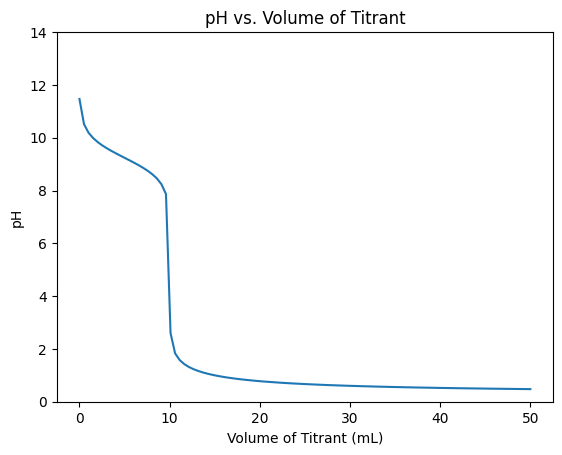

In [10]:
volume_analyte = 10
volume_titrant_list = np.linspace(0,50, 100)
cAcid = 0.5
cBase = 0.5
kb = 10**-4.76

calculator = PHCalculatorWeakBase(volume_analyte, cAcid, cBase,kb)
calculator.plot_curve(volume_titrant_list)